# Currency exchange rates prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/currency-exchange-rates/exchange_rates.csv')

In [3]:
data.head()

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17/12/2021
1,1,Great Britain Pound,GBP,0.851619,17/12/2021
2,2,Euro,EUR,1.000000,17/12/2021
3,3,Japan Yen,JPY,128.301759,17/12/2021
4,4,Switzerland Franc,CHF,1.041015,17/12/2021


In [4]:
data['Country/Currency'].value_counts()

Australia Dollar          113
Morocco Dirham            113
Myanmar Kyat              113
NL Antilles Guilder       113
Namibia Dollar            113
                         ... 
El Salvador Colon         113
Ethiopia Birr             113
Falkland Islands Pound    113
Zambia Kwacha             113
Euro                      111
Name: Country/Currency, Length: 150, dtype: int64

In [5]:
df = data[data['Country/Currency'] == 'Australia Dollar']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 16798
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        113 non-null    int64  
 1   Country/Currency  113 non-null    object 
 2   currency          113 non-null    object 
 3   value             113 non-null    float64
 4   date              113 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.3+ KB


In [7]:
df['date'] = pd.to_datetime(df['date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 16798
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        113 non-null    int64         
 1   Country/Currency  113 non-null    object        
 2   currency          113 non-null    object        
 3   value             113 non-null    float64       
 4   date              113 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [9]:
#ARIMA
# AR  --P
#I ---D
#MA ----Q

In [10]:
df= df[['date','value']]

In [11]:
df  = df.set_index('date')

<AxesSubplot:xlabel='date'>

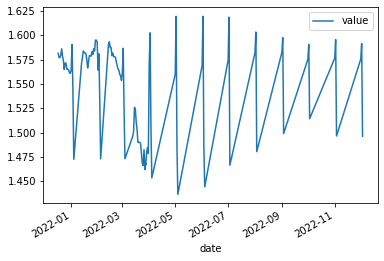

In [12]:
df.plot()

In [13]:
df.head(1)

,value
date,
2021-12-17,1.581627


In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
m = adfuller(df['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)      

test statistics              0.253759
p-value                      0.975121
lags used                    0.000000
no of observations used    112.000000
critical value(1%)          -3.490131
critical value(5%)          -2.887712
critical value(10%)         -2.580730
dtype: float64


In [16]:
log = np.log(df)

In [17]:
logmean = log.rolling(window = 12).mean()
logstd = log.rolling(window = 12).std()

In [18]:
logmeanscale = log - logmean

In [19]:
logmeanscale = logmeanscale.dropna()

In [20]:
m = adfuller(logmeanscale['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)  

test statistics             -3.136418
p-value                      0.023973
lags used                    1.000000
no of observations used    100.000000
critical value(1%)          -3.497501
critical value(5%)          -2.890906
critical value(10%)         -2.582435
dtype: float64


In [21]:
exp = log.ewm(halflife = 12,min_periods = 0,adjust = True).mean()

In [22]:
logexp = log - exp

In [23]:
m = adfuller(logexp['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)  

test statistics             -1.589360
p-value                      0.488936
lags used                    0.000000
no of observations used    112.000000
critical value(1%)          -3.490131
critical value(5%)          -2.887712
critical value(10%)         -2.580730
dtype: float64


In [24]:
logshift = log-log.shift()
logshift = logshift.dropna()

In [25]:
m = adfuller(logshift['value'],autolag = 'AIC')
out = pd.Series(m[0:4],index=['test statistics','p-value','lags used','no of observations used'])
for key,value in m[4].items():
        out['critical value(%s)'%key]=value
print(out)  

test statistics           -9.166726e+00
p-value                    2.449365e-15
lags used                  0.000000e+00
no of observations used    1.110000e+02
critical value(1%)        -3.490683e+00
critical value(5%)        -2.887952e+00
critical value(10%)       -2.580857e+00
dtype: float64


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [27]:
import  statsmodels.api as sm

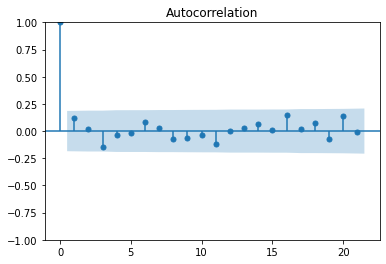

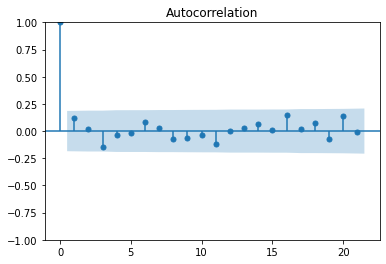

In [28]:
sm.graphics.tsa.plot_acf(logshift)

In [29]:
# q =1

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


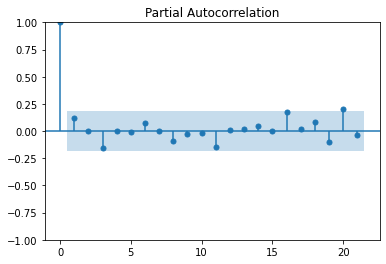

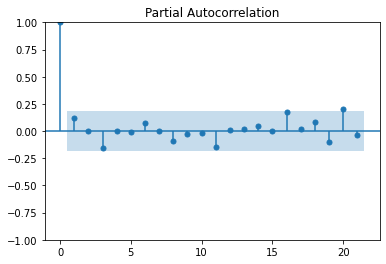

In [30]:
sm.graphics.tsa.plot_pacf(logshift)

In [31]:
#p =1

In [32]:
model = sm.tsa.arima.ARIMA(logshift,order = (1,1,0))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:599: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:599: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/conda

In [33]:
result = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [34]:
#RSS

In [35]:
sum(result.fittedvalues-logshift['value'])**2

1.7095466976811223e-06

In [36]:
pred = result.predict(1,10)

In [37]:
original = logshift.head(10)

<AxesSubplot:xlabel='date'>

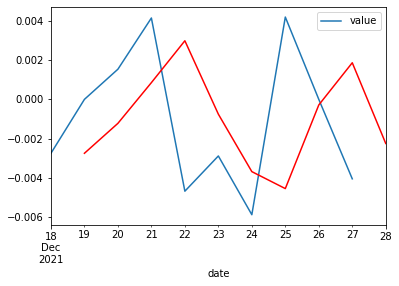

In [38]:
original.plot()
pred.plot(color = 'red')

In [39]:
logshift.shape

(112, 1)

In [40]:
result.predict(112,122)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


112   -0.002277
113    0.001095
114   -0.000405
115    0.000263
116   -0.000034
117    0.000098
118    0.000039
119    0.000065
120    0.000054
121    0.000059
122    0.000056
Name: predicted_mean, dtype: float64